# Part 1: EDA and Feature Selection

The data from this notebook can be found on the kaggle competition page. Here is the description of the challenge: 

The Inter-American Development Bank is asking the Kaggle community for help with income qualification for some of the world's poorest families. Are you up for the challenge?

Here's the backstory: Many social programs have a hard time making sure the right people are given enough aid. It’s especially tricky when a program focuses on the poorest segment of the population. The world’s poorest typically can’t provide the necessary income and expense records to prove that they qualify.

In Latin America, one popular method uses an algorithm to verify income qualification. It’s called the Proxy Means Test (or PMT). With PMT, agencies use a model that considers a family’s observable household attributes like the material of their walls and ceiling, or the assets found in the home to classify them and predict their level of need.

While this is an improvement, accuracy remains a problem as the region’s population grows and poverty declines.

To improve on PMT, the IDB (the largest source of development financing for Latin America and the Caribbean) has turned to the Kaggle community. They believe that new methods beyond traditional econometrics, based on a dataset of Costa Rican household characteristics, might help improve PMT’s performance.

Beyond Costa Rica, many countries face this same problem of inaccurately assessing social need. If Kagglers can generate an improvement, the new algorithm could be implemented in other countries around the world.

https://www.kaggle.com/c/costa-rican-household-poverty-prediction

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import numpy as np

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_colwidth', -1)

## Data Cleaning

We will start by uploading our data as a pandas dataframe. After then we will find which columns contain null values, and then use the .describe method to find the best way to fill in these null values. 

In [71]:
data_location= 'raw_data.csv'
df = pd.read_csv(data_location, low_memory=False)
print(df.shape)
df.head()

(9557, 143)


,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [72]:
#find null values
df.isnull().any().sort_values()[df.isnull().any()==True]

SQBmeaned    True
v18q1        True
rez_esc      True
v2a1         True
meaneduc     True
dtype: bool

In [73]:
df[['meaneduc','v2a1','rez_esc','SQBmeaned','v18q1']].describe().T

,count,mean,std,min,25%,50%,75%,max
meaneduc,9552.0,9.231523,4.167694,0.0,6.0,9.0,11.60000,37.0
v2a1,2697.0,165231.606971,150457.133301,0.0,80000.0,130000.0,200000.00000,2353477.0
rez_esc,1629.0,0.459791,0.946550,0.0,0.0,0.0,1.00000,5.0
SQBmeaned,9552.0,102.588867,93.516890,0.0,36.0,81.0,134.56001,1369.0
v18q1,2215.0,1.404063,0.763131,1.0,1.0,1.0,2.00000,6.0


In [74]:
df[df.meaneduc.isnull()][['idhogar','parentesco1','escolari']]

,idhogar,parentesco1,escolari
1291,1b31fd159,1,10
1840,a874b7ce7,0,6
1841,a874b7ce7,1,4
2049,faaebf71a,1,12
2050,faaebf71a,0,12


We can start by iterating through the null values on 'meanduc', simply by calculating the mean education of all the family members.

In [75]:
no_meaneduc = df[df['meaneduc'].isnull()][['escolari','idhogar']]

for i,j in zip(no_meaneduc.index,no_meaneduc['idhogar']):
    df.loc[i,'meaneduc'] = np.mean(df[df['idhogar']==j]['escolari'])

We can see that 'v2a1' is null only when 'tipovivi1', 'tipovivi4', or 'tipovivi5' is equal to one. These variables have to do with home ownership, so for now we can just replace the null values with 0. We will also do this for remaining null values in our dataframes. 

In [79]:
print(df[df['v2a1'].isnull()][[i for i in df.columns if 'tipovivi' in i]].sum(axis=0))

df[[i for i in df.columns if 'tipovivi' in i]].sum(axis=0)

tipovivi1    0
tipovivi2    0
tipovivi3    0
tipovivi4    0
tipovivi5    0
dtype: int64


tipovivi1    5911
tipovivi2    961 
tipovivi3    1736
tipovivi4    163 
tipovivi5    786 
dtype: int64

In [80]:
df = df.fillna({'v18q1':0, 'rez_esc':0, 'SQBmeaned':0,'v2a1':0})          

Next we can check to see if our features have mixed datatypes. We can see this in the 'dependency', 'edjefe', and 'edjefa' features. We can simply replace the No's with 0 and the Yes's with 1. 

In [82]:
df.select_dtypes('object').head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


In [83]:
mapping = {"yes": 1, "no": 0}

df['dependency'] = df['dependency'].replace(mapping).astype(np.float64)
df['edjefa'] = df['edjefa'].replace(mapping).astype(np.float64)
df['edjefe'] = df['edjefe'].replace(mapping).astype(np.float64)

We can do some feature reduction here. Since 'edjefa' and 'edjefe' both are the head of household education split on gender we can combine these into a single Feature called 'edje.'

In [84]:
#head of house education

df['edje'] = np.sum(df[['edjefa','edjefe']],axis=1)

Finally we can check to see if there are any households with no head. For these houses we will set the oldest person as the head of the household. 

In [86]:
households_leader = df.groupby('idhogar')['parentesco1'].sum()

households_no_head = df.loc[df['idhogar'].isin(households_leader[households_leader == 0].index), :]

len(households_leader[households_leader == 0])    

15

In [87]:
for val in households_leader[households_leader == 0].index:
    ds = df[df['idhogar'] == val]
    df.loc[(ds['age'].idxmax()),'parentesco1'] = 1

In [88]:
households_leader = df.groupby('idhogar')['parentesco1'].sum()

households_leader.value_counts()

1    2988
Name: parentesco1, dtype: int64

Now we can see all of our households have one head. Finally we can take a look and see the distrubution of our target variables. Additionally, we will takes a look at our two largest households to establish which features are household features (the same for all member of the households) and person features (each person has a different values). 

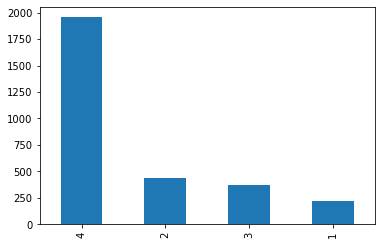

In [89]:
df[df['parentesco1']==1]['Target'].value_counts().plot(kind='bar')

In [90]:
temp= df[df['idhogar'].isin(['fd8a6d014','0c7436de6'])]  
temp.sort_index(axis=1)

,Id,SQBage,SQBdependency,SQBedjefe,SQBescolari,SQBhogar_nin,SQBhogar_total,SQBmeaned,SQBovercrowding,Target,abastaguadentro,abastaguafuera,abastaguano,age,agesq,area1,area2,bedrooms,cielorazo,computer,coopele,dependency,dis,edje,edjefa,edjefe,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,epared1,epared2,epared3,escolari,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,female,hacapo,hacdor,hhsize,hogar_adul,hogar_mayor,hogar_nin,hogar_total,idhogar,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,male,meaneduc,mobilephone,noelec,overcrowding,paredblolad,pareddes,paredfibras,paredmad,paredother,paredpreb,paredzinc,paredzocalo,parentesco1,parentesco10,parentesco11,parentesco12,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,pisocemento,pisomadera,pisomoscer,pisonatur,pisonotiene,pisoother,planpri,public,qmobilephone,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,refrig,rez_esc,rooms,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,tamhog,tamviv,techocane,techoentrepiso,techootro,techozinc,television,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,v14a,v18q,v18q1,v2a1
2467,ID_8611b82fd,256,5.062500,0,49,81,169,16.00,18.777779,1,1,0,0,16,256,1,0,3,0,0,0,2.250000,0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,1,0,0,1,0,7,0,0,0,0,0,0,1,0,0,1,0,0,1,1,1,1,13,4,0,9,13,fd8a6d014,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,4.0,1,0,4.333334,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,6,5,2,7,2,4,6,7,6,13,1,2.0,4,0,0,1,0,0,13,13,0,0,0,1,0,0,0,1,0,0,1,0,0.0,80000.0
2468,ID_735924181,0,5.062500,0,0,81,169,16.00,18.777779,1,1,0,0,0,0,1,0,3,0,0,0,2.250000,0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,13,4,0,9,13,fd8a6d014,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,4.0,1,0,4.333334,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,6,5,2,7,2,4,6,7,6,13,1,0.0,4,0,0,1,0,0,13,13,0,0,0,1,0,0,0,1,0,0,1,0,0.0,80000.0
2469,ID_4abf9fda7,81,5.062500,0,4,81,169,16.00,18.777779,1,1,0,0,9,81,1,0,3,0,0,0,2.250000,0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,1,0,0,1,0,2,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,13,4,0,9,13,fd8a6d014,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,4.0,1,0,4.333334,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,6,5,2,7,2,4,6,7,6,13,1,0.0,4,0,0,1,0,0,13,13,0,0,0,1,0,0,0,1,0,0,1,0,0.0,80000.0
2470,ID_0162aa0ab,25,5.062500,0,0,81,169,16.00,18.777779,1,1,0,0,5,25,1,0,3,0,0,0,2.250000,0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,13,4,0,9,13,fd8a6d014,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4.0,1,0,4.333334,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,6,5,2,7,2,4,6,7,6,13,1,0.0,4,0,0,1,0,0,13,13,0,0,0,1,0,0,0,1,0,0,1,0,0.0,80000.0
2471,ID_0edfb31d9,196,5.062500,0,36,81,169,16.00,18.777779,1,1,0,0,14,196,1,0,3,0,0,0,2.250000,0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,1,0,0,1,0,6,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,1,13,4,0,9,13,fd8a6d014,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,4.0,1,0,4.333334,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,6,5,2,7,2,4,6,7,6,13,1,1.0,4,0,0,1,0,0,13,13,0,0,0,1,0,0,0,1,0,0,1,0,0.0,80000.0
2472,ID_126c8bc2a,64,5.062500,0,1,81,169,16.00,18.777779,1,1,0,0,8,64,1,0,3,0,0,0,2.250000,0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,13,4,0,9,13,fd8a6d014,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,4.0,1,0,4.333334,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,6,5,2,7,2,4,6,7,6,13,1,0.0,4,0,0,1,0,0,13,13,0,0,0,1,0,0,0,1,0,0,1,0,0.0,80000.0
2473,ID_8c48580ed,49,5.062500,0,0,81,169,16.00,18.777779,1,1,0,0,7,49,1,0,3,0,0,0,2.250000,0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,13,4,0,9,13,fd8a6d014,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,4.0,1,0,4.333334,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,6,5,2,7,2,4,6,7,6,13,1,0.0,4,0,0,1,0,0,13,13,0,0,0,1,0,0,0,1,0,0,1,0,0.0,80000.0
24

## Feature Selection 

We will now begin our features selection. First step is to create a Dataframe with just our Target variables. This will be used later to select the Feature we will put into our model.

In [91]:
import seaborn as sns

df_Target = df[df['parentesco1']==1][['idhogar','Target']].set_index('idhogar')

My strategy for feature selection is to look at break the features based on whether they are countinous variables or dummy variables, and whether they are person variables or household variables. First we will look at our countinous variables for persons. Since we can to calculate based on household we will take the mean values for the household for the variables in person_count. Then we will create a coorelation matrix and pick out the variables with the highest coorelation (but remove the ones that have high collinearity with another feature.)

In [92]:
person_count = ['idhogar',
'v18q',
'escolari',
'rez_esc',
'dis',
'mobilephone',
'age',
'SQBescolari',
'SQBage',
'agesq']


df_person_count = df[person_count].groupby('idhogar').mean()
df_person_count = df_person_count.join(df_Target)

v18q           0.231182
escolari       0.422700
SQBescolari    0.388140
Target         1.000000
Name: Target, dtype: float64


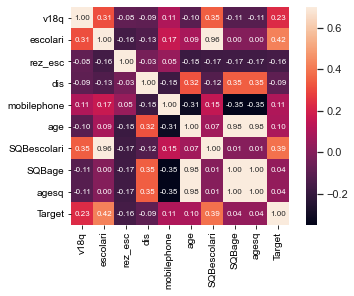

In [93]:
corr_mat= df_person_count.corr()
f, ax= plt.subplots()
sns.set(rc={'figure.figsize':(8,8)})
sns.heatmap(corr_mat, vmax=.7, cbar=True, annot=True, square=True, fmt='.2f',annot_kws={'size': 8})

print(corr_mat[abs(corr_mat['Target'])>=.2]['Target'])

In [94]:
person_count_mean_features = ['v18q','escolari']

df_person_count = df_person_count[person_count_mean_features]

The dataframe created in the last cell (df_person_count) is one of a several dataframes we will join together in the end of feature selection. Next we will find pick our Household countinous features. Since these are same for all member of the household we do not have to do any prior transformation before creating our coorelation matrix.

In [95]:
#on a seperate document I went through and seperated household varables and person varaibles, also by countinous variables and what are essentially dummy varaibles
household_count = ['v2a1',
'hacdor',
'rooms',
'hacapo',
'v14a',
'refrig',
'v18q1',
'r4h1',
'r4h2',
'r4h3',
'r4m1',
'r4m2',
'r4m3',
'r4t1',
'r4t2',
'r4t3',
'tamhog',
'tamviv',
'hhsize',
'cielorazo',
'idhogar',
'hogar_nin',
'hogar_adul',
'hogar_mayor',
'hogar_total',
'dependency',
'edje',
'edjefe',
'edjefa',
'meaneduc',
'bedrooms',
'overcrowding',
'computer',
'television',
'qmobilephone',
'SQBhogar_total',
'SQBedjefe',
'SQBhogar_nin',
'SQBovercrowding',
'SQBdependency',
'SQBmeaned',
'Target']
df_household_count = df[df['parentesco1']==1][household_count].set_index('idhogar')

v2a1               0.166253
hacdor            -0.135793
rooms              0.201015
refrig             0.119386
v18q1              0.197994
r4h1              -0.186958
r4m1              -0.209461
r4m3              -0.142682
r4t1              -0.260961
r4t3              -0.112336
tamhog            -0.112410
tamviv            -0.123274
hhsize            -0.112410
cielorazo          0.294827
hogar_nin         -0.266838
hogar_adul         0.128265
hogar_total       -0.112410
dependency        -0.126343
edje               0.333544
edjefe             0.234611
meaneduc           0.333050
bedrooms           0.135104
overcrowding      -0.234435
computer           0.173698
television         0.137786
qmobilephone       0.167579
SQBhogar_total    -0.115847
SQBedjefe          0.241372
SQBhogar_nin      -0.257302
SQBovercrowding   -0.217031
SQBmeaned          0.275097
Target             1.000000
Name: Target, dtype: float64

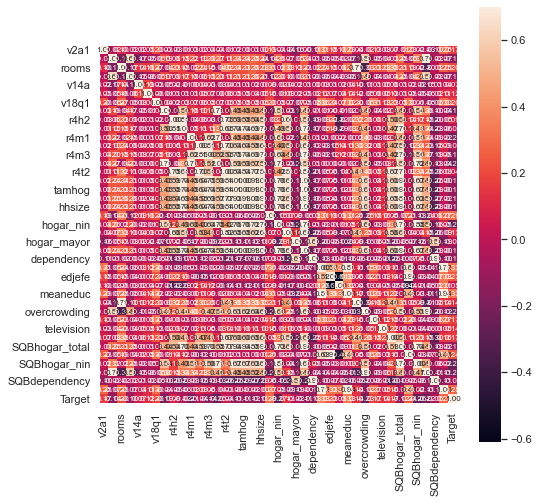

In [96]:
corr_mat= df_household_count.corr()
f, ax= plt.subplots()
sns.set(rc={'figure.figsize':(12,12)})
sns.heatmap(corr_mat, vmax=.7, cbar=True, annot=True, square=True, fmt='.2f',annot_kws={'size': 8})
house_count_features_all = corr_mat.loc[abs(corr_mat['Target'])>.1].index
corr_mat[abs(corr_mat['Target'])>=.1]['Target']

Since our dataframe is difficult to read, we will filter down to only features which have a coorelation of more then .1. 

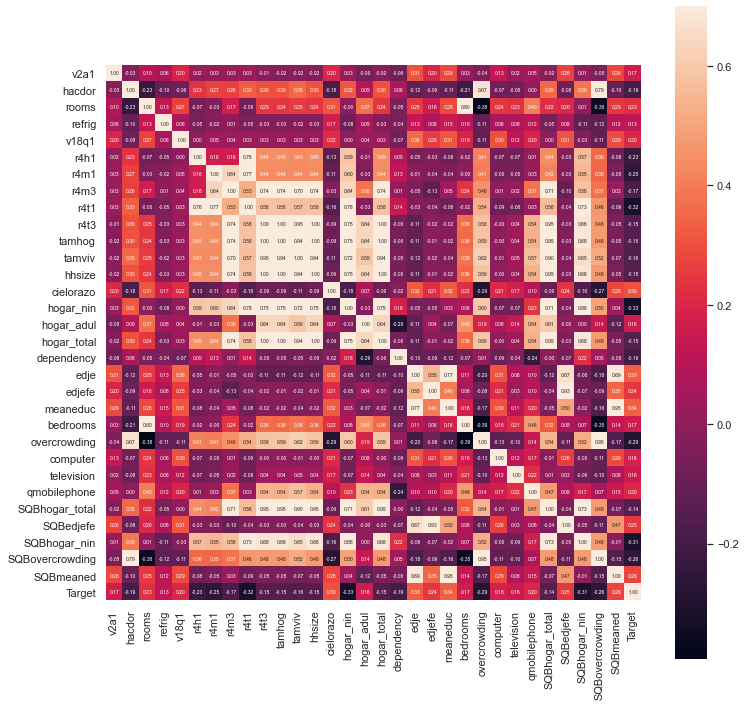

In [99]:
df_temp= df[house_count_features_all]
corr_mat_num=df_temp.corr()
sns.heatmap(corr_mat_num, vmax=.7, cbar=True, annot=True, square=True, fmt='.2f',annot_kws={'size': 5})

In [98]:
house_count_features = ['v2a1', 'rooms', 'refrig', 'v18q1','r4t1', 'hhsize', 
        'cielorazo', 'dependency', 'edje', 'meaneduc','overcrowding', 'computer', 'television', 'qmobilephone']

df_household_count = df_household_count[house_count_features]

We have selected our features for our household countinous variables; next we will examine the person variables of just the head of the household. Since we are trying to find the economic vunerability of the family, it is reasonable to assume that the attributes of the head of the household has significant bearing to their need.

In [100]:
head_count = ['idhogar',
'v18q',
'escolari',
'rez_esc',
'dis',
'mobilephone',
'age',
'SQBescolari',
'SQBage',
'agesq',
'Target']

df_head_count = df[df['parentesco1']==1][head_count].set_index('idhogar')

v18q           0.231182
escolari       0.333465
mobilephone    0.105977
SQBescolari    0.314287
Target         1.000000
Name: Target, dtype: float64

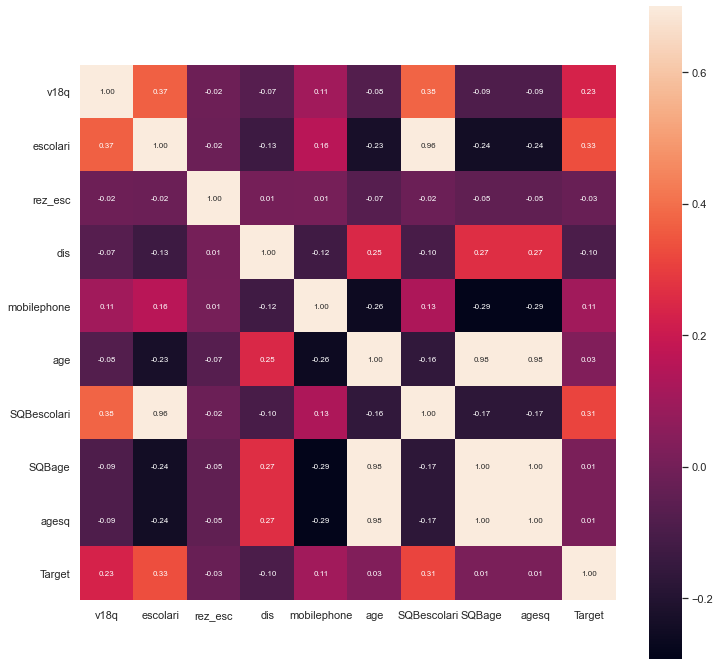

In [101]:
corr_mat= df_head_count.corr()
f, ax= plt.subplots()
sns.set(rc={'figure.figsize':(8,8)})
sns.heatmap(corr_mat, vmax=.7, cbar=True, annot=True, square=True, fmt='.2f',annot_kws={'size': 8})

corr_mat[abs(corr_mat['Target'])>=.1]['Target']

In [102]:
head_count_features=['v18q','escolari','mobilephone']

df_head_count = df_head_count[head_count_features]

That does it for the countinous variables, now we can start looking at our dummy variables. The dataset has already split anything that was a categorical variables into single one hot encoded columns. I will try to "convert" some of these features into ordinal values by running linear regression to check for coorelation, and then assign appropriate values to them. After seperating out the ordinal values, I will pick out the dummy features which have high coorelation with the 'Target' variable. 

In [104]:
from sklearn.linear_model import LinearRegression

household_dummy_list = ['pared','techo','energco','epared','eviv','tipovivi','area','piso',
                        'abastagua','sanitario','elimbasu','etecho','lugar']

corr_dict = {}
for v in household_dummy_list:
    df_temp = df[df['parentesco1']==1][['idhogar','Target']+[i for i in df.columns if i[:len(v)] == v]].set_index('idhogar')
    y_temp = df_temp['Target']
    df_temp_X = df_temp.drop(columns=['Target'],axis=1)
    print(df_temp.shape,y_temp.shape,v)
    linear = LinearRegression()
    linear.fit(df_temp_X , y_temp)
    corr_dict[v] = linear.score(df_temp_X, y_temp)

v='elec'

df_temp = df[df['parentesco1']==1][['idhogar','Target','public','planpri','noelec','coopele',]].set_index('idhogar')
y_temp = df_temp['Target']
df_temp_X = df_temp.drop(columns=['Target'],axis=1)
linear = LinearRegression()
linear.fit(df_temp_X , y_temp)
corr_dict[v] = linear.score(df_temp_X, y_temp)
    
{k:v for k,v in zip(corr_dict.keys(),corr_dict.values()) if v>.03} 

(2988, 9) (2988,) pared
(2988, 5) (2988,) techo
(2988, 5) (2988,) energco
(2988, 4) (2988,) epared
(2988, 4) (2988,) eviv
(2988, 6) (2988,) tipovivi
(2988, 3) (2988,) area
(2988, 7) (2988,) piso
(2988, 4) (2988,) abastagua
(2988, 6) (2988,) sanitario
(2988, 7) (2988,) elimbasu
(2988, 4) (2988,) etecho
(2988, 7) (2988,) lugar


{'pared': 0.07311348184412303,
 'energco': 0.04406208969042391,
 'epared': 0.08850189550807397,
 'eviv': 0.0945469053133201,
 'tipovivi': 0.03627795877741902,
 'piso': 0.08219784947795816,
 'etecho': 0.07694576800807218,
 'lugar': 0.034084883954664025}

In [105]:
df_household_ordinal = df[df['parentesco1']==1][['idhogar']].set_index('idhogar')

In [106]:
def check_ordinal(val) :

    df_ord = df[df['parentesco1']==1][['idhogar','Target']+[i for i in df.columns if i[:len(val)] == val]].set_index('idhogar')
    y_temp = df_ord['Target']

    df_ord = df_ord.drop(columns=['Target'],axis=1)
    for i,x in enumerate(df_ord.columns):
        df_ord[x] = df_ord[x].map({1:i+1})
        print(i+1,x)

    df_ord[val] = np.sum(df_ord,axis=1)
    print(df_ord[val].value_counts()) #REMOVE THIS LATER

    df_ord['Target'] = y_temp


    df_ord[[val,'Target']].groupby(val).mean().plot(kind='bar')
    
        

In [107]:
def add_ordinal(val , df_ordinal) :

    df_ord = df[df['parentesco1']==1][['idhogar']+[i for i in df.columns if i[:len(val)] == val]].set_index('idhogar')

    for i,x in enumerate(df_ord.columns):
        df_ord[x] = df_ord[x].map({1:i+1})

    df_ord[val] = np.sum(df_ord,axis=1)
    if val not in df_ordinal.columns: 
        df_ordinal[val] = df_ord[val]
            
    return df_ordinal 
    

1 etecho1
2 etecho2
3 etecho3
3.0    1756
2.0    836 
1.0    396 
Name: etecho, dtype: int64


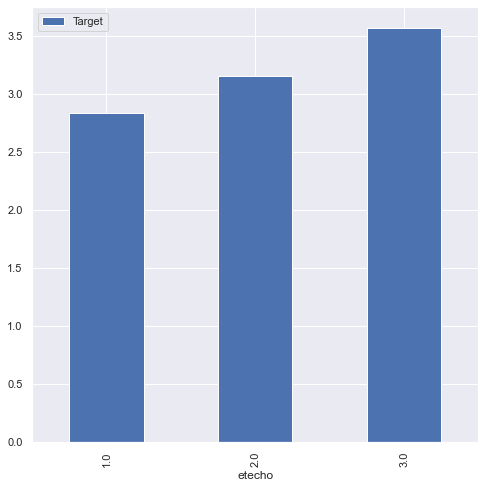

In [108]:
check_ordinal('etecho')

In [109]:
mapping_dict = {'pared' : {1:3, 8:1, 2:2, 3:2, 5:2, 6:2, 4:1, 7:1},
                'energco' : {4:1, 3:2, 2:2, 1:1},
                'piso' : {1:3,2:2,3:3,6:2, 4:1, 5:1}}

#no mapping needed for epared, eviv,etecho

household_ordinal_features = ['pared','energco','piso','epared', 'eviv', 'etecho']

for i in household_ordinal_features: 
    df_household_ordinal = add_ordinal(i, df_household_ordinal)

print(df_household_ordinal.shape)
for k,v in zip(mapping_dict.keys(),mapping_dict.values()):
    print(k)
    df_household_ordinal[k] = df_household_ordinal[k].map(v)
    
print(df_household_ordinal.shape)

(2988, 6)
pared
energco
piso
(2988, 6)


In [110]:
household_dummy_features = ['tipovivi','lugar']
df_household_dummy = df[df['parentesco1']==1][['idhogar']].set_index('idhogar')

for j in household_dummy_features:
    df_temp = df[df['parentesco1']==1][['idhogar']+[i for i in df.columns if i[:len(j)] == j]].set_index('idhogar')
    df_household_dummy = df_household_dummy.join(df_temp)
    

We will follow the same process for our person dummy variables. 

In [111]:
person_dummy_list = ['estadocivil','instlevel','male']

corr_dict = {}
for v in person_dummy_list:
    df_temp = df[['idhogar']+[i for i in df.columns if i[:len(v)] == v]].groupby('idhogar').sum()
    df_temp = df_temp.join(df_Target)
    
    y_temp = df_temp['Target']
    df_temp_X = df_temp.drop(columns=['Target'],axis=1)
    linear = LinearRegression()
    linear.fit(df_temp_X , y_temp)
    corr_dict[v] = linear.score(df_temp_X, y_temp)
    
corr_dict

{'estadocivil': 0.08853278893067351,
 'instlevel': 0.20793109766151574,
 'male': 0.00046256878642914057}

In [112]:
v= 'estadocivil'

df_temp = df[['idhogar']+[i for i in df.columns if i[:len(v)] == v]].groupby('idhogar').sum()
df_temp = df_temp.join(df_Target)
    
y_temp = df_temp['Target']
df_temp_X = df_temp.drop(columns=['Target'],axis=1)
linear = LinearRegression()
linear.fit(df_temp_X , y_temp)

print(np.sum(df_temp_X))
print(linear.score(df_temp_X, y_temp))
linear.coef_

estadocivil1    1317
estadocivil2    1178
estadocivil3    2565
estadocivil4    305 
estadocivil5    600 
estadocivil6    317 
estadocivil7    3275
dtype: int64
0.08853278893067351


array([-0.30613656,  0.05702046,  0.15510906,  0.29409858, -0.06369907,
       -0.04294765, -0.03412787])

In [113]:
v= 'instlevel'

df_temp = df[['idhogar']+[i for i in df.columns if i[:len(v)] == v]].groupby('idhogar').mean()
df_temp = df_temp.join(df_Target)
    
y_temp = df_temp['Target']
df_temp_X = df_temp.drop(columns=['Target'],axis=1)
linear = LinearRegression()
linear.fit(df_temp_X , y_temp)

print(np.sum(df_temp_X))
print(linear.score(df_temp_X, y_temp))
linear.coef_

instlevel1    340.846123
instlevel2    509.199514
instlevel3    645.110256
instlevel4    519.980325
instlevel5    339.431999
instlevel6    46.353175 
instlevel7    46.744048 
instlevel8    480.498846
instlevel9    59.002381 
dtype: float64
0.18604911189613982


array([-1.03744879, -0.62023565, -0.02248983,  0.19011301,  0.4508457 ,
        0.08786285,  0.56483877,  0.81994238,  0.87224356])

In [114]:
person_dummy_features = ['estadocivil1', 'estadocivil3','estadocivil4','instlevel1','instlevel2','instlevel5','instlevel7',
                        'instlevel8','instlevel9']

df_person_dummy = df[['idhogar']+person_dummy_features].groupby('idhogar').sum()

We can follow the same method to find our relevant Head of Houshold features we want to include. 

In [119]:
corr_dict = {}
for v in person_dummy_list:
    df_temp = df[df['parentesco1']==1][['idhogar','Target'] + [i for i in df.columns if i[:len(v)] == v]].set_index('idhogar')
    
    y_temp = df_temp['Target']
    df_temp_X = df_temp.drop(columns=['Target'],axis=1)
    linear = LinearRegression()
    linear.fit(df_temp_X , y_temp)
    corr_dict[v] = linear.score(df_temp_X, y_temp)
    
corr_dict

{'estadocivil': 0.03728808640175141,
 'instlevel': 0.11694685655130177,
 'male': 0.008465960874737166}

1 instlevel1
2 instlevel2
3 instlevel3
4 instlevel4
5 instlevel5
6 instlevel6
7 instlevel7
8 instlevel8
9 instlevel9
3.0    841
4.0    516
2.0    505
8.0    496
5.0    354
1.0    129
9.0    88 
7.0    35 
6.0    23 
0.0    1  
Name: instlevel, dtype: int64


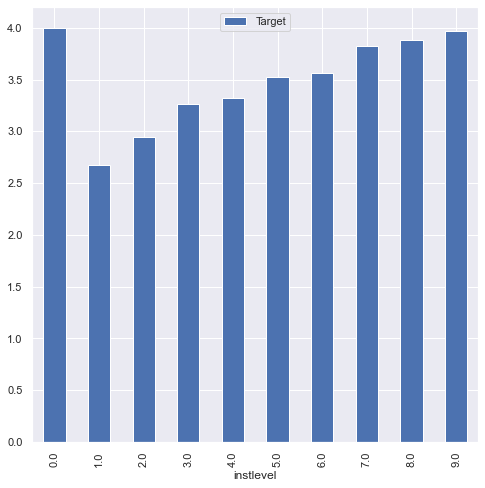

In [120]:

check_ordinal('instlevel')

In [121]:
mapping_dict = {9:5,8:5,7:5,6:4,5:4,4:3,3:3,2:2,1:1,0:3}

In [122]:
val = 'instlevel'

df_head_ordinal = df[df['parentesco1']==1][['idhogar']+[i for i in df.columns if i[:len(val)] == val]].set_index('idhogar')

for i,x in enumerate(df_head_ordinal.columns):
    df_head_ordinal[x] = df_head_ordinal[x].map({1:i+1})

df_head_ordinal[val] = np.sum(df_head_ordinal,axis=1)
    
df_head_ordinal[val] = df_head_ordinal[val].map(mapping_dict)
df_head_ordinal = df_head_ordinal[[val]]

In [123]:
df_head_ordinal.head()

,instlevel
idhogar,
21eb7fcc1,3
0e5d7a658,5
2c7317ea8,4
2b58d945f,4
d6dae86b7,3


Finally we can join all our dataframes together. 

In [124]:
df_cleaned = df_person_count.join(df_household_count)
df_cleaned = df_cleaned.join(df_head_count, lsuffix = '_person',rsuffix = '_head')
df_cleaned = df_cleaned.join(df_household_ordinal)
df_cleaned = df_cleaned.join(df_household_dummy)
df_cleaned = df_cleaned.join(df_person_dummy)
df_cleaned = df_cleaned.join(df_head_ordinal)
df_cleaned = df_cleaned.join(df_Target)


print(df_cleaned.shape)

(2988, 47)


We can now check for colinnearity between all of our features. Then we will drop those that are co linear, create a new Feature that takes a percent of the household that are under 12, and save our dataframe to a csv (cleaned_household_data.csv)

v18q_person
v18q_person    1.000000
v18q1          0.860748
v18q_head      1.000000
Name: v18q_person, dtype: float64
escolari_person
escolari_person    1.000000
edje               0.762825
meaneduc           0.801230
escolari_head      0.764631
Name: escolari_person, dtype: float64
v2a1
v2a1    1.0
Name: v2a1, dtype: float64
rooms
rooms    1.0
Name: rooms, dtype: float64
refrig
refrig    1.0
Name: refrig, dtype: float64
v18q1
v18q_person    0.860748
v18q1          1.000000
v18q_head      0.860748
Name: v18q1, dtype: float64
r4t1
r4t1            1.000000
estadocivil1    0.934932
Name: r4t1, dtype: float64
hhsize
hhsize    1.0
Name: hhsize, dtype: float64
cielorazo
cielorazo    1.0
Name: cielorazo, dtype: float64
dependency
dependency    1.0
Name: dependency, dtype: float64
edje
escolari_person    0.762825
edje               1.000000
meaneduc           0.806339
escolari_head      0.998595
instlevel          0.946614
Name: edje, dtype: float64
meaneduc
escolari_person    0.801230
edje   

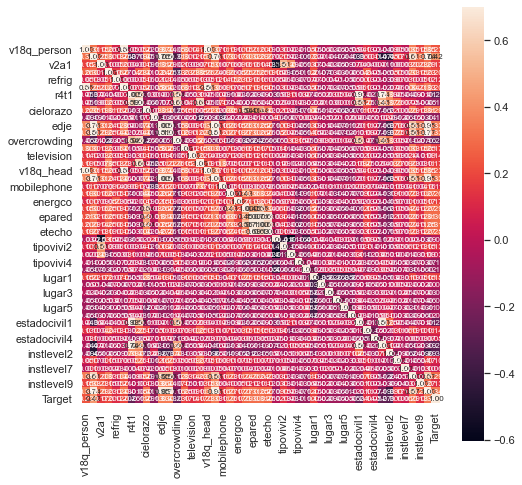

In [125]:
corr_mat= df_cleaned.corr()
f, ax= plt.subplots()
sns.set(rc={'figure.figsize':(8,8)})
sns.heatmap(corr_mat, vmax=.7, cbar=True, annot=True, square=True, fmt='.2f',annot_kws={'size': 8})

for i in corr_mat:
    print(i)
    print(corr_mat[abs(corr_mat[i])>=.75][i])    

In [126]:
df_cleaned = df_cleaned.drop(columns = ['v18q_person','v18q_head'])

df_cleaned['Youth'] = df_cleaned['r4t1']/df_cleaned['hhsize']

df_cleaned = df_cleaned[[i for i in df_cleaned.columns if i != 'Target'] + ['Target']]

print(df_cleaned.shape)
df_cleaned.head()

(2988, 46)


,escolari_person,v2a1,rooms,refrig,v18q1,r4t1,hhsize,cielorazo,dependency,edje,meaneduc,overcrowding,computer,television,qmobilephone,escolari_head,mobilephone,pared,energco,piso,epared,eviv,etecho,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,estadocivil1,estadocivil3,estadocivil4,instlevel1,instlevel2,instlevel5,instlevel7,instlevel8,instlevel9,instlevel,Youth,Target
idhogar,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
001ff74ca,8.00,0.0,6,1,1.0,1,2,1,1.000000,16.0,16.0,0.50,0,0,1,16,1,3,2,3,3.0,3.0,3.0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,5,0.50,4
003123ec2,3.25,0.0,3,1,0.0,2,4,0,1.000000,6.0,6.5,2.00,0,0,2,6,1,2,2,2,2.0,1.0,3.0,0,0,0,0,1,0,0,0,0,1,0,2,0,0,2,0,0,0,0,0,3,0.50,2
006031de3,9.25,180000.0,4,1,2.0,2,4,1,1.000000,15.0,15.5,2.00,0,0,2,15,1,3,2,3,2.0,2.0,2.0,0,0,1,0,0,1,0,0,0,0,0,1,2,0,0,2,0,0,2,0,5,0.50,4
006555fe2,10.40,0.0,6,1,0.0,0,5,1,0.666667,4.0,10.4,1.25,0,1,4,4,1,3,2,3,2.0,3.0,2.0,1,0,0,0,0,1,0,0,0,0,0,0,2,0,0,1,1,0,2,0,2,0.00,4
00693f597,7.50,150000.0,4,1,0.0,1,4,1,1.000000,9.0,10.0,2.00,0,0,3,9,1,3,2,3,2.0,3.0,3.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,3,0.25,4


In [127]:
df_cleaned.to_csv('cleaned_household_data.csv')

## Transform Testing Data

We will preform the same data cleaning, and transformation on our testing dataset. 

In [128]:
data_location= 'test.csv'
test = pd.read_csv(data_location, low_memory=False)

In [129]:
no_meaneduc = test[test['meaneduc'].isnull()][['escolari','idhogar']]

for i,j in zip(no_meaneduc.index,no_meaneduc['idhogar']):
    test.loc[i,'meaneduc'] = np.mean(test[test['idhogar']==j]['escolari'])
    
test = test.fillna({'v18q1':0, 'rez_esc':0, 'SQBmeaned':0,'v2a1':0})          

In [130]:
mapping = {"yes": 1, "no": 0}

test['dependency'] = test['dependency'].replace(mapping).astype(np.float64)
test['edjefa'] = test['edjefa'].replace(mapping).astype(np.float64)
test['edjefe'] = test['edjefe'].replace(mapping).astype(np.float64)

test['edje'] = np.sum(test[['edjefa','edjefe']],axis=1)

In [131]:
households_leader = test.groupby('idhogar')['parentesco1'].sum()

households_no_head = test.loc[test['idhogar'].isin(households_leader[households_leader == 0].index), :]

len(households_leader[households_leader == 0])  

for val in households_leader[households_leader == 0].index:
    ds = test[test['idhogar'] == val]
    test.loc[(ds['age'].idxmax()),'parentesco1'] = 1

In [132]:
df_person_count = test[['idhogar','v18q','escolari']].groupby('idhogar').mean()

In [133]:
df_household_count = test[test['parentesco1']==1][['idhogar','v2a1', 'rooms', 'refrig', 'v18q1','r4t1', 'hhsize', 
                                               'cielorazo', 'dependency', 'edje', 'meaneduc','overcrowding', 'computer', 
                                              'television', 'qmobilephone']].set_index('idhogar')

In [134]:
df_head_count = test[test['parentesco1']==1][['idhogar', 'v18q','escolari','mobilephone']].set_index('idhogar')

In [135]:
def add_ordinal(val , df_ordinal) :

    df_ord = test[test['parentesco1']==1][['idhogar']+[i for i in test.columns if i[:len(val)] == val]].set_index('idhogar')

    for i,x in enumerate(df_ord.columns):
        df_ord[x] = df_ord[x].map({1:i+1})

    df_ord[val] = np.sum(df_ord,axis=1)
    if val not in df_ordinal.columns: 
        df_ordinal[val] = df_ord[val]
            
    return df_ordinal 

In [136]:
df_household_ordinal = test[test['parentesco1']==1][['idhogar']].set_index('idhogar')

mapping_dict = {'pared' : {1:3, 8:1, 2:2, 3:2, 5:2, 6:2, 4:1, 7:1},
                'energco' : {4:1, 3:2, 2:2, 1:1},
                'piso' : {1:3,2:2,3:3,6:2, 4:1, 5:1}}


household_ordinal_features = ['pared','energco','piso','epared', 'eviv', 'etecho']

for i in household_ordinal_features: 
    df_household_ordinal = add_ordinal(i, df_household_ordinal)

print(df_household_ordinal.shape)
for k,v in zip(mapping_dict.keys(),mapping_dict.values()):
    df_household_ordinal[k] = df_household_ordinal[k].map(v)

(7352, 6)


In [137]:
household_dummy_features = ['tipovivi','lugar']
df_household_dummy = test[test['parentesco1']==1][['idhogar']].set_index('idhogar')

for j in household_dummy_features:
    df_temp = test[test['parentesco1']==1][['idhogar']+[i for i in test.columns if i[:len(j)] == j]].set_index('idhogar')
    df_household_dummy = df_household_dummy.join(df_temp)

In [138]:
df_person_dummy = test[['idhogar','estadocivil1', 'estadocivil3','estadocivil4','instlevel1','instlevel2','instlevel5','instlevel7',
                        'instlevel8','instlevel9']].groupby('idhogar').sum()

In [139]:
val = 'instlevel'

mapping_dict = {9:5,8:5,7:5,6:4,5:4,4:3,3:3,2:2,1:1,0:3}

df_head_ordinal = test[test['parentesco1']==1][['idhogar']+[i for i in test.columns if i[:len(val)] == val]].set_index('idhogar')

for i,x in enumerate(df_head_ordinal.columns):
    df_head_ordinal[x] = df_head_ordinal[x].map({1:i+1})

df_head_ordinal[val] = np.sum(df_head_ordinal,axis=1)
    
df_head_ordinal[val] = df_head_ordinal[val].map(mapping_dict)
df_head_ordinal = df_head_ordinal[[val]]

In [140]:
test_cleaned = df_person_count.join(df_household_count)
test_cleaned = test_cleaned.join(df_head_count, lsuffix = '_person',rsuffix = '_head')
test_cleaned = test_cleaned.join(df_household_ordinal)
test_cleaned = test_cleaned.join(df_household_dummy)
test_cleaned = test_cleaned.join(df_person_dummy)
test_cleaned = test_cleaned.join(df_head_ordinal)

In [141]:
test_cleaned = test_cleaned.drop(columns = ['v18q_person','v18q_head'])

test_cleaned['Youth'] = test_cleaned['r4t1']/test_cleaned['hhsize']

In [142]:
test_cleaned.to_csv('cleaned_test_data.csv')

Continued with Part 2: Random Forest Classifier

-Fin